## Importing Pakcages

In [97]:
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})


## Reading Data

In [101]:
raw_data = pd.read_csv("marketingraw.csv")
raw_data.head()


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


### Null Values 

In [47]:
raw_data.isna()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
180,False,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False,False
182,False,True,True,True,True,True,True,True,True,True,True
183,False,True,True,True,True,True,True,True,True,True,True


In [48]:
#Total Null values

raw_data.isna().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [103]:
#Visualising Null Values
raw_data.isnull() # Remove NaN value from all Data

raw_data[raw_data['Month'].isnull()] #Remove NaN value from specific column

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Dropping Null Values

raw_data = raw_data.dropna()

raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [51]:
#Finding all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :182
The number of values for feature Week :28
The number of values for feature Week_ID :28
The number of values for feature Month :7 -- [ 1.  2.  3.  4.  5. 11. 12.]
The number of values for feature Month_ID :7 -- [11. 12. 13. 14. 15. 16. 17.]
The number of values for feature Year :2 -- [2020. 2021.]
The number of values for feature Day_Name :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors :175
The number of values for feature Revenue :181
The number of values for feature Marketing Spend :182
The number of values for feature Promo :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


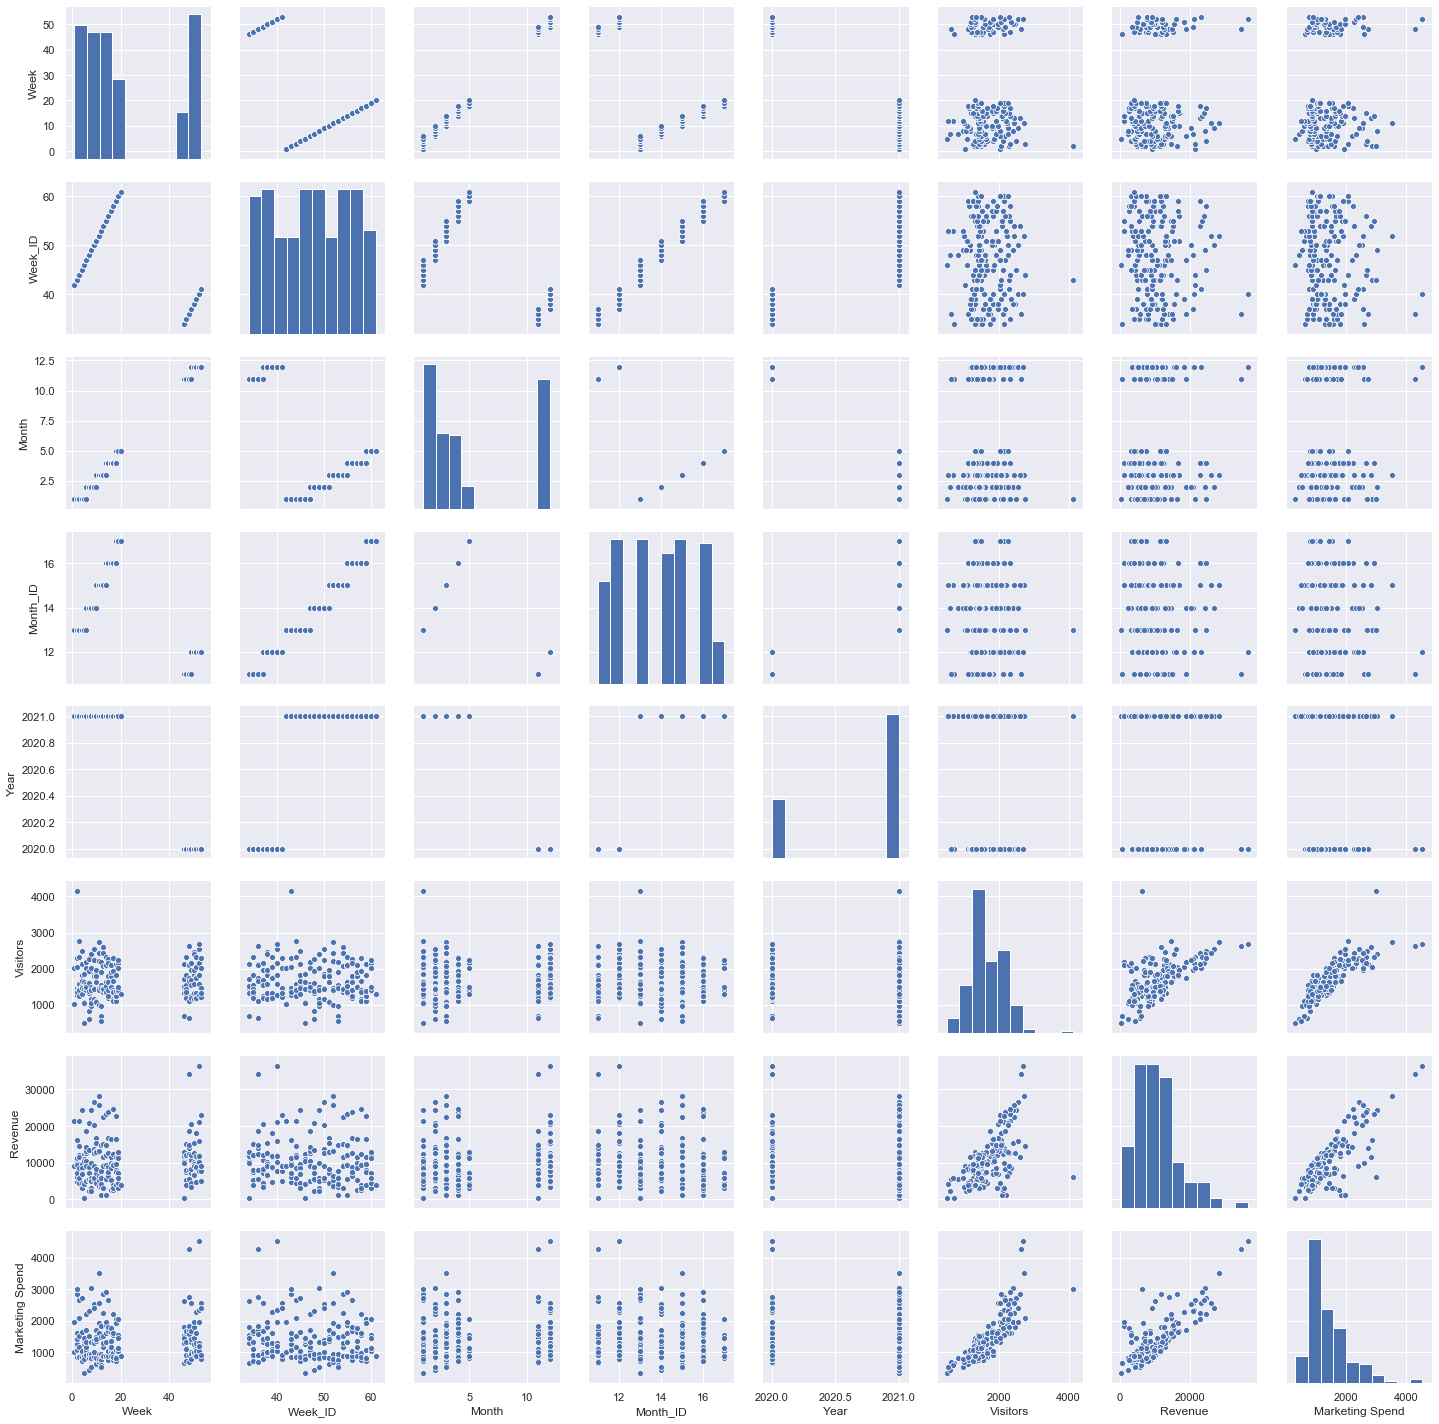

In [52]:
# Pairplotting to view the insights
g = sns.pairplot(raw_data)
plt.show()

# Notes: Do not run this on a big dataset. Filter the columns first


In [53]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

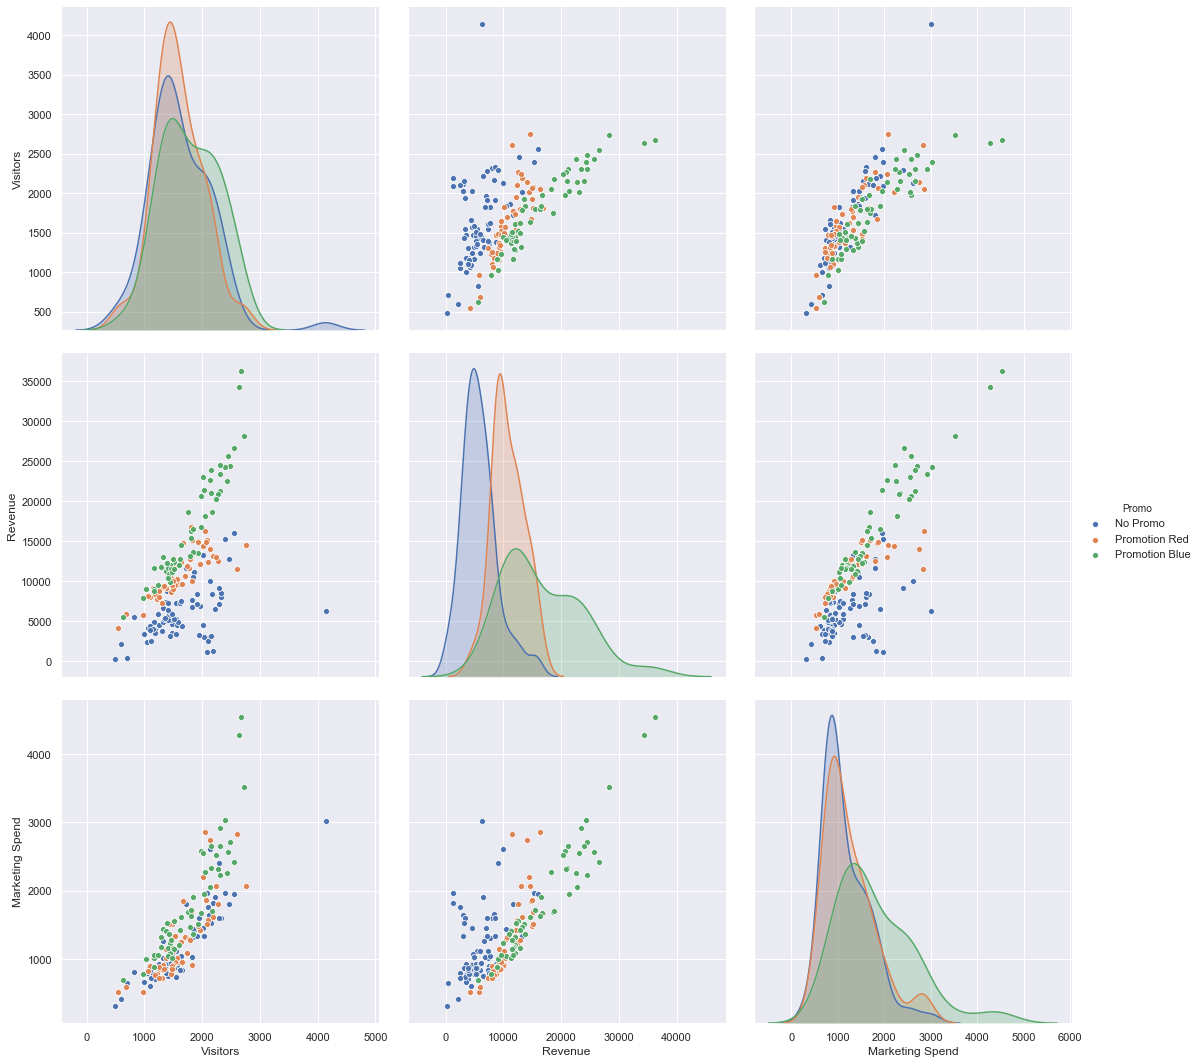

In [54]:
# Visualising a Subset of our data - important features - promo
g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo', height = 5)

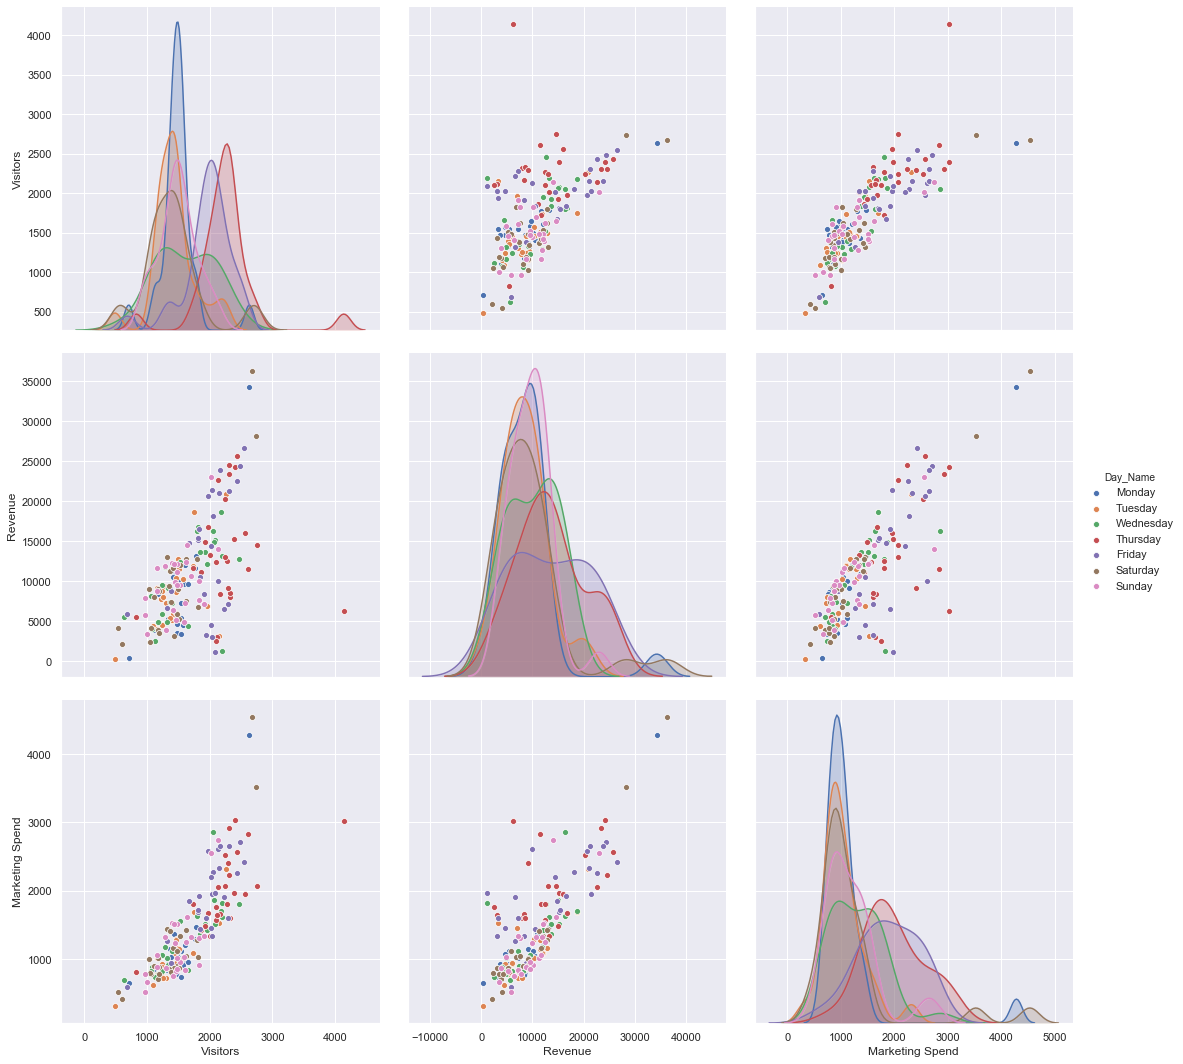

In [55]:
# Visualising a Subset of our data - important features - Day
g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue = 'Day_Name', height = 5)

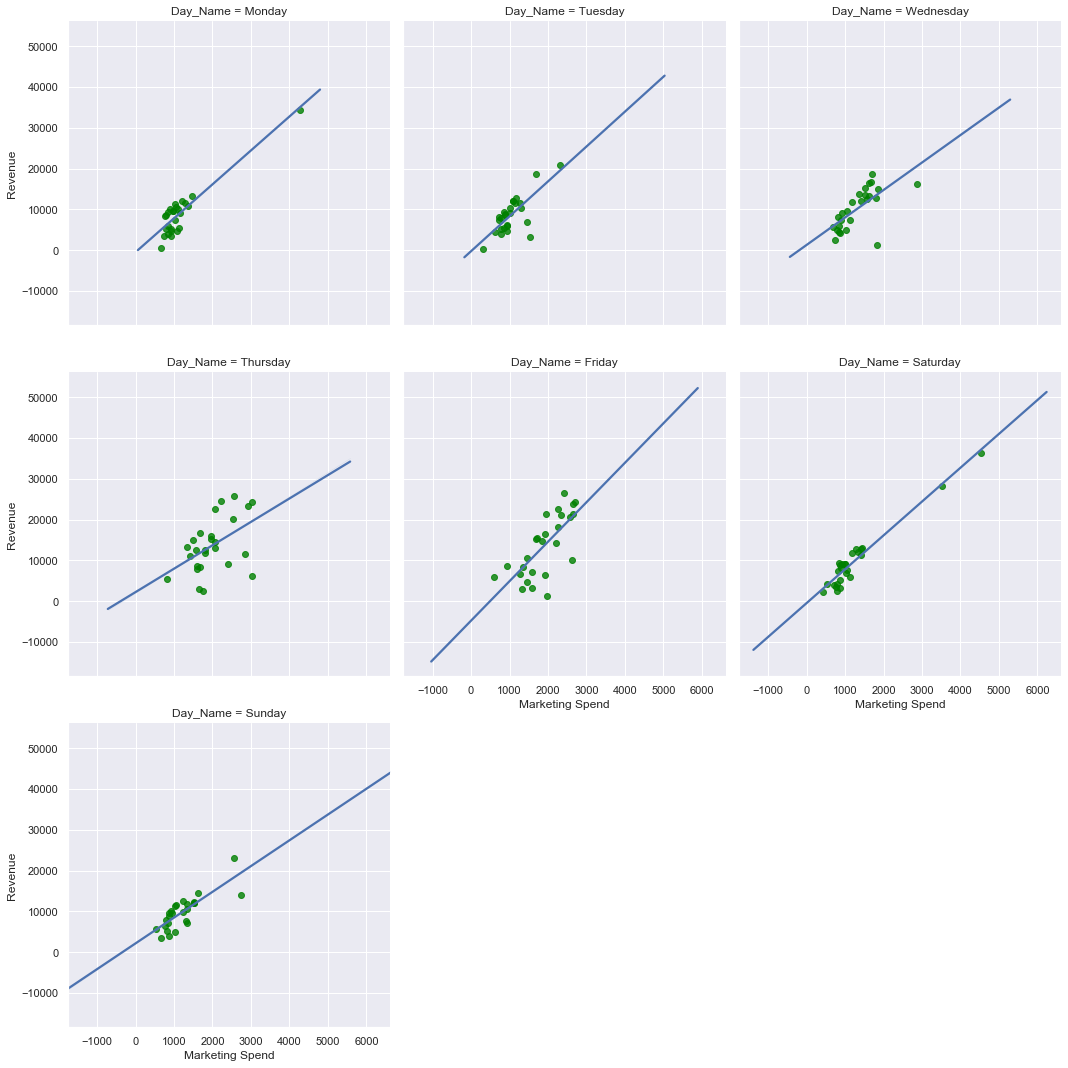

In [107]:
# Visualising a Subset of our data - important features

g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = True)

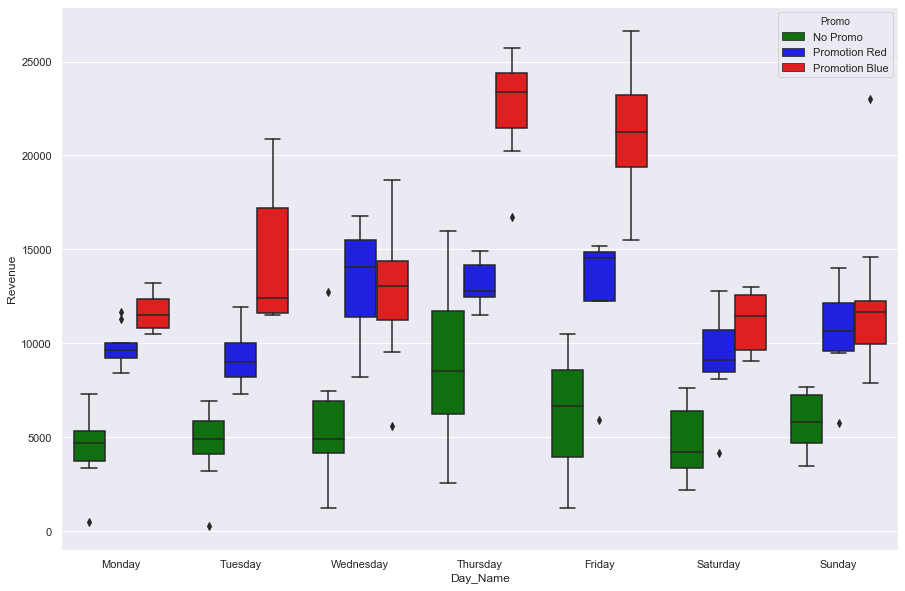

In [74]:

# Investigate the distribution of Revenue by Categorical Variables
plt.figure(figsize=(15,10))
pal = ['green', 'blue','red']

g = sns.boxplot(x = 'Day_Name', y = 'Revenue', data = raw_data, hue = 'Promo', palette = pal,)
               
#ax = sns.swarmplot(x = 'Day_Name', y = 'Revenue', data = raw_data, palette = pal, hue = 'Promo')

## Data Cleaning

In [96]:
# Deleting outliers

raw_data = raw_data[raw_data['Revenue'] < 27000]

raw_data.shape

(179, 5)

In [59]:
# Selecting usefull columns only
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

#visualize the raw data
raw_data.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [81]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

# Visualizing the data
new_raw_data.head()

#Nominal and ordinal explain

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


In [82]:
# Running Correlation and feature selection

hm = new_raw_data[['Visitors','Revenue','Marketing Spend']].corr()

#data stored in hm for heatmap visualisation

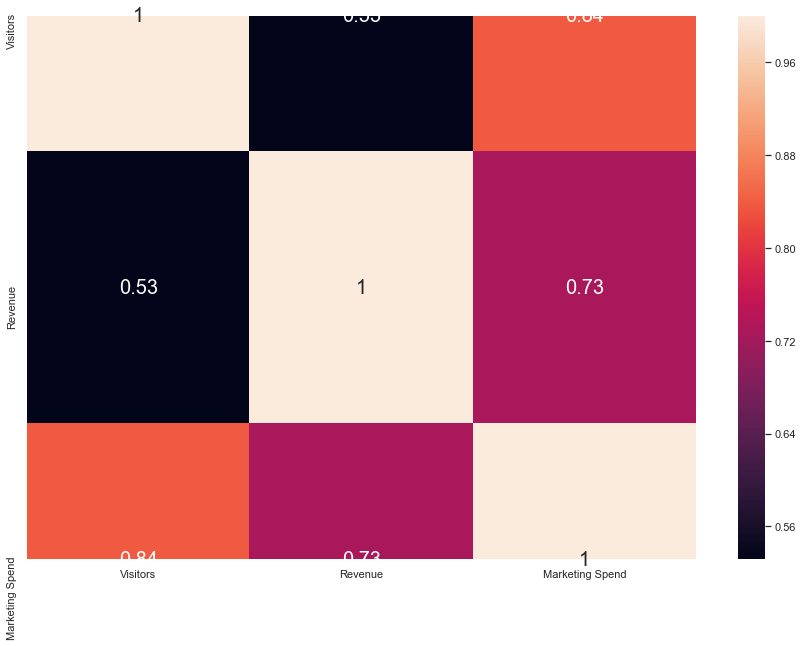

In [94]:
# Visualizing Correlation with a Heatmap

plt.figure(figsize=(15,10))

g = sns.heatmap(hm,annot = True, annot_kws={'size':'20'},)

.corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation
More Info here: https://statisticsbyjim.com/basics/correlations/

In [84]:
# Split the data into X & y

x = new_raw_data.drop('Revenue', axis = 1).values #We put .values, it turns dataframe into an array so can model accept it.
x2 = new_raw_data.drop('Revenue', axis = 1)
y = new_raw_data['Revenue']

print(x.shape)
print(y.shape)



(179, 12)
(179,)


In [85]:
# Hold-out validation and Splitting data.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size = 0.2, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(143, 12)
(36, 12)
(143,)
(36,)


#### Home work

In [99]:
# Training the Regression
lm = LinearRegression(fit_intercept = True)
lm.fit(x_train, y_train)

y_pred = lm.predict(x_train)